In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime
from sklearn.linear_model import LinearRegression

In [3]:
def get_data(filename):
    with open(filename, 'r') as f:
        raw = f.read()
    return json.loads(raw)

# def clean_extremes(data, inf=5, sup=95):
#     dinf = np.percentile(data, inf)
#     dsup = np.percentile(data, sup)
#     data = [d for d in data if d >= dinf and d <= dsup]
#     return data

In [4]:
def get_model(plens, rtds):
    X = np.array(plens).reshape(-1, 1)
    y = np.array(rtds)
    model = LinearRegression().fit(X, y)
    rtds_ = model.predict(X)
    return model, rtds_

In [5]:
links = ['s1-eth2--h1-eth0', 's1-eth1--s2-eth1', 's2-eth2--s3-eth1', 's3-eth2--h2-eth0']

Estimated bandwidth for link s1-eth2--h1-eth0: 439.434 Mbps
Intercept for link s1-eth2--h1-eth0: 2.310 ms
Estimated bandwidth for link s1-eth1--s2-eth1: 9.907 Mbps
Intercept for link s1-eth1--s2-eth1: 10.400 ms
Estimated bandwidth for link s2-eth2--s3-eth1: 129.793 Mbps
Intercept for link s2-eth2--s3-eth1: 20.466 ms
Estimated bandwidth for link s3-eth2--h2-eth0: 111.329 Mbps
Intercept for link s3-eth2--h2-eth0: 20.456 ms


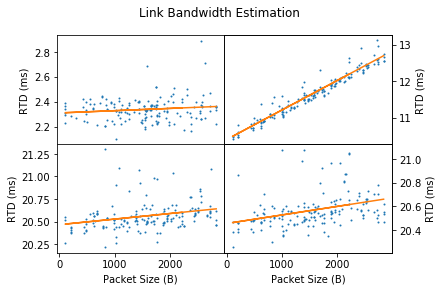

In [6]:
fig, axs = plt.subplots(2, 2, sharex=True)
plt.suptitle("Link Bandwidth Estimation"); plt.xlabel("Packet Size (B)")

i, j = 0, 0
for link in links:
    if j == 1:
        axs[i][j].set_yticks([])
        axs[i][j] = axs[i][j].twinx()
    data = get_data(link)
    
    qlens = data['qlens']
    indices = [i for i in range(len(qlens)) if qlens[i] == 0]
    
    rtds = data['rtds']
    rtds = [rtds[i] for i in indices]
    plens = data['plens']
    plens = [plens[i]/8 for i in indices]
#     print(len(indices), len(plens))
    
    axs[i][j].scatter(plens, rtds, 1, label='Measured')
    axs[i][j].plot([], [])
    
    model, rtds_ = get_model(plens, rtds)
    [a] = model.coef_
    b = 8000/a/1000000
    print("Estimated bandwidth for link %s: %.3f Mbps" % (link, b))
    print("Intercept for link %s: %.3f ms" % (link, model.intercept_))
    axs[i][j].plot(plens, rtds_)
    
    axs[i][j].set_ylabel("RTD (ms)")
    if i == 1:
        axs[i][j].set_xlabel("Packet Size (B)")
    
    i = (i + j) % 2
    j = (j + 1) % 2
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('bandwidths.png')